<a href="https://colab.research.google.com/github/fintekhab/CODSOFT/blob/main/MovieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"/content/IMDb Movies India.csv", encoding = 'latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [53]:
df_cleaned = df.dropna().copy()
df_cleaned.loc[:,'Prime Genre'] = df_cleaned['Genre'].apply(lambda x: x.split(', ')[0] if ', ' in x else x)
df_cleaned.drop(columns=['Genre'], inplace=True)
df_cleaned


,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Prime Genre
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
3,#Yaaram,(2019),110 min,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
5,...Aur Pyaar Ho Gaya,(1997),147 min,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy
6,...Yahaan,(2005),142 min,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama
8,?: A Question Mark,(2012),82 min,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama
15494,Zubeidaa,(2001),153 min,6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography
15503,Zulm Ki Zanjeer,(1989),125 min,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action
15505,Zulmi,(1999),129 min,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action


**Extracting only String from Name**

In [54]:

df_cleaned['Name'] =df_cleaned['Name'].str.extract('([A-Za-z\s\'\-]+)')

**Converting Year to INTEGER**

In [55]:
df_cleaned['Year'] = df_cleaned['Year'].str.replace(r'[()]','',regex=True).astype(int)

**Converting Duration to Integer(We remove this 'min' word too)**

In [56]:
df_cleaned['Duration']=pd.to_numeric(df_cleaned['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

**Converting Votes to Numeric**

In [57]:
df_cleaned['Votes']=pd.to_numeric(df_cleaned['Votes'].str.replace(',',''), errors='coerce')

**Transformed Data**

In [58]:
df_cleaned

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Prime Genre
1,Gadhvi,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy
6,Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama
8,A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama
15494,Zubeidaa,2001,153,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography
15503,Zulm Ki Zanjeer,1989,125,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action


**Removing Duplicate Values**

In [70]:
df_cleaned.drop_duplicates(subset=['Name'], keep=False)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Prime Genre,Director_encoded,Actor_1.encoded,Actor_2.encoded,Genre_mean_rating
1,Gadhvi,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,7.000000,6.850000,7.000000,6.248697
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,4.400000,5.420000,4.400000,5.838423
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,5.313333,4.788889,5.786667,5.838423
6,Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,7.383333,5.435000,6.933333,6.248697
8,A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,5.600000,5.600000,5.883333,4.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama,6.100000,6.725000,6.100000,6.248697
15494,Zubeidaa,2001,153,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography,7.250000,4.157143,5.823077,6.697619
15503,Zulm Ki Zanjeer,1989,125,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,6.270000,6.307692,5.800000,5.511985
15505,Zulmi,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,5.225000,5.481707,4.640000,5.511985


from matplotlib import pyplot as plt
_df_30['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Votes', y='Director_encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Director_encoded']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Director_encoded')

from matplotlib import pyplot as plt
_df_42['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

**Statistical Measures**

In [77]:
df_cleaned.describe()

,Year,Duration,Rating,Votes,Director_encoded,Actor_1.encoded,Actor_2.encoded,Genre_mean_rating
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585,5.898533,5.898533,5.898533,5.898533
std,19.741839,25.319939,1.381165,13651.503584,1.118306,1.037218,1.060753,0.413946
min,1931.000000,21.000000,1.100000,5.000000,1.600000,1.400000,1.600000,4.333333
25%,1983.000000,119.000000,5.000000,30.000000,5.226829,5.322857,5.281818,5.511985
50%,2002.000000,135.000000,6.100000,131.000000,6.000000,5.945652,5.975000,5.838423
75%,2013.000000,150.000000,6.900000,922.500000,6.700000,6.588889,6.600000,6.248697
max,2021.000000,321.000000,10.000000,591417.000000,10.000000,10.000000,10.000000,7.608333


**Visualisations**

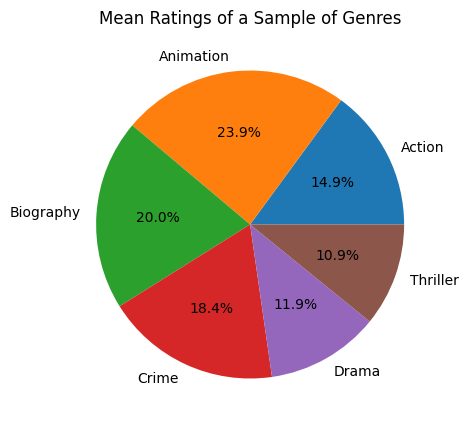

In [72]:
sample_df = df_cleaned.sample(n=10, random_state=42)
genres = sample_df['Prime Genre'].unique()

fig, ax= plt.subplots(figsize=(10,5))

genre_mean_rating = sample_df.groupby('Prime Genre')['Rating'].mean()
plt.pie(genre_mean_rating, labels=genre_mean_rating.index, autopct ='%1.1f%%')
plt.title("Mean Ratings of a Sample of Genres")
plt.show()

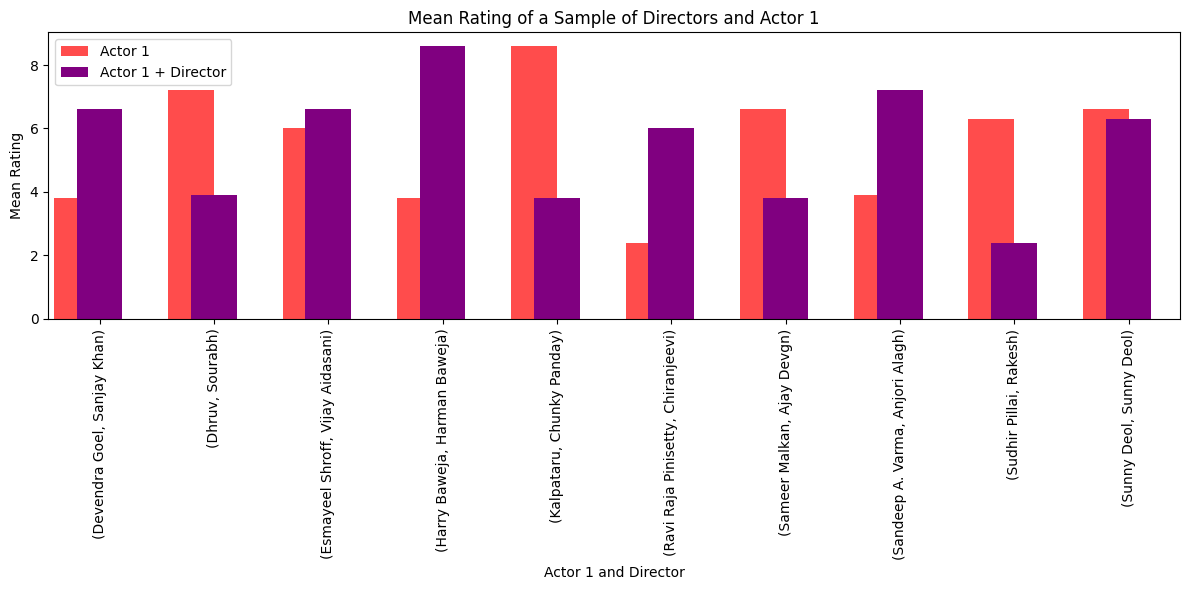

In [73]:
sample_df = df_cleaned.sample(n=10, random_state=42)
director_actor_rating_mean = sample_df.groupby(['Director','Actor 1'])['Rating'].mean()
actor_mean_rating = sample_df.groupby('Actor 1')['Rating'].mean()

fig, ax = plt.subplots(figsize = (12,6))
actor_mean_rating.plot(kind = 'bar', color ='red', ax = ax, width = 0.4, position = 1, alpha = 0.7, label = 'Actor 1')
director_actor_rating_mean.plot(kind='bar',color= 'purple', ax=ax, width = 0.4, xlabel = 'Director and Actor 1', legend='Both', label = 'Actor 1 + Director')
ax.set_title('Mean Rating of a Sample of Directors and Actor 1')
ax.set_xlabel("Actor 1 and Director")
ax.set_ylabel('Mean Rating')

pivot_table = director_actor_rating_mean.unstack()
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Linear Regression Model**

In [74]:
genre_mean_rating = df_cleaned.groupby('Prime Genre')['Rating'].transform('mean')
df_cleaned['Genre_mean_rating'] = genre_mean_rating


director_mean_rating = df_cleaned.groupby('Director')['Rating'].transform('mean')
df_cleaned['Director_encoded'] = director_mean_rating

actor1_mean_rating = df_cleaned.groupby('Actor 1')['Rating'].transform('mean')
df_cleaned['Actor_1.encoded'] = actor1_mean_rating

actor2_mean_rating = df_cleaned.groupby('Actor 2')['Rating'].transform('mean')
df_cleaned['Actor_2.encoded'] = actor2_mean_rating


X= df_cleaned[['Year', 'Votes', 'Duration', 'Director_encoded', 'Actor_1.encoded', 'Actor_2.encoded', 'Genre_mean_rating']]
y=df_cleaned['Rating']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

model =LinearRegression()


In [75]:
model.fit(X_train, y_train)

LinearRegression()

**Model Score**

In [76]:
model.score(X_train, y_train)

0.7527221797050078

**The model is 75.27% accurate**